In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from copy import deepcopy
import seaborn as sns

In [330]:
df = pd.read_excel('/Users/maartenk/Documents/git/CookBooks/Sources/weer.xls')#, index_col='jaar')

In [331]:
df_ = pd.read_excel('/Users/maartenk/Documents/git/CookBooks/Sources/intrest_rate.xlsx', index_col='Year')

In [340]:
df_.shape

(702, 4)

In [341]:
df_ = df_.dropna()

In [342]:
df_.shape

(693, 4)

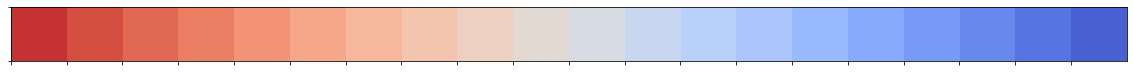

In [351]:
sns.palplot(sns.color_palette('coolwarm', 20)[::-1])

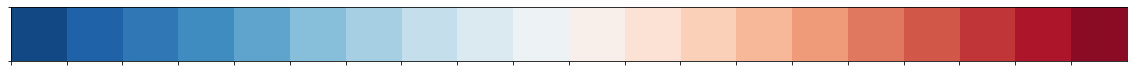

In [339]:
sns.palplot(sns.color_palette('RdBu_r',20))

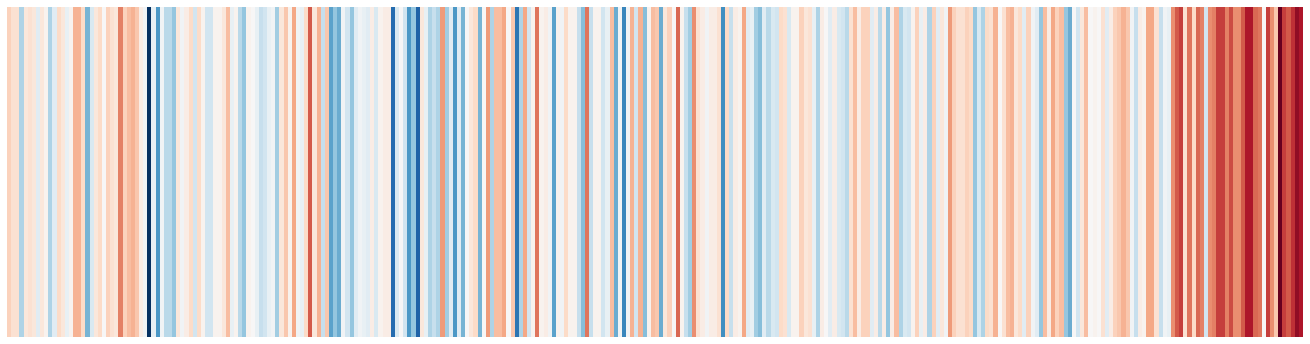

In [346]:
temps = df['jaargen'][::-1]
# temps = temps_bremen
# temps = temps_berlin_brandenburg




stacked_temps = np.stack((temps, temps))

vmin = 5.9
vmax = 11
## plotting
###############
plt.figure(figsize=(18,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40 )

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
# plt.savefig("stripes.png", bbox_inches = 'tight',
#     pad_inches = 0, dpi=400)

In [334]:
df_['rolling10'] = df_['Nominal'].rolling(10).mean()

Text(0.5, 0.98, 'Why banking is in trouble')

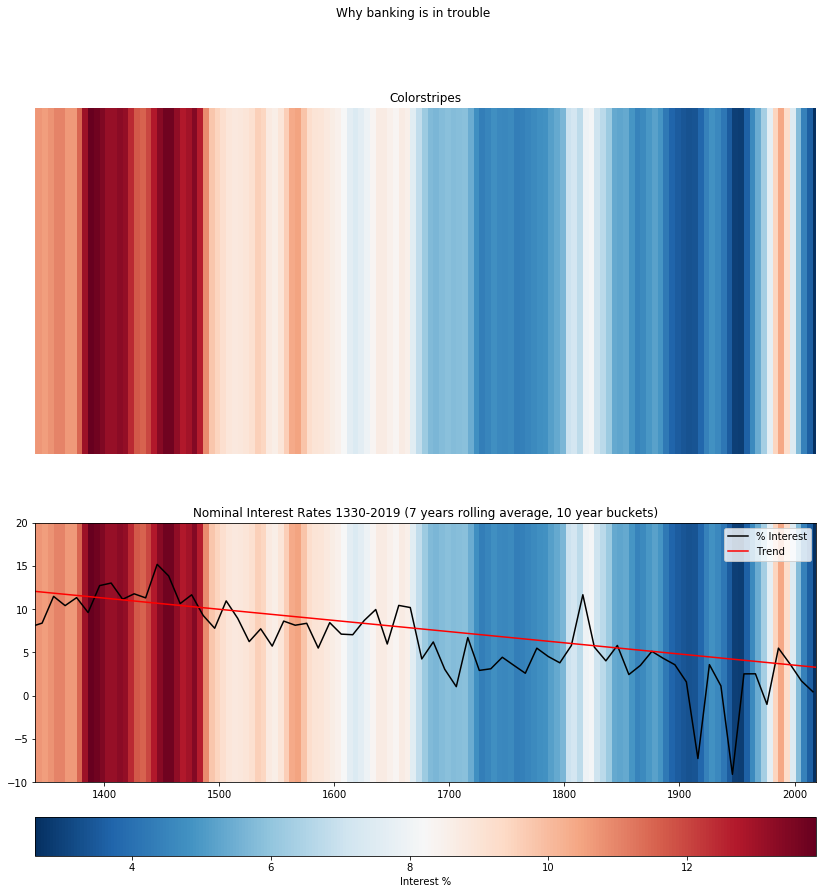

In [406]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from copy import deepcopy
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'Open Sans'

# URL = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'

# df = pd.read_fwf(
#     URL,
#     skiprows=(0, 1, 2, 4),
#     index_col=0,
# )

year_mean = df_['rolling10'][10::5]
max_abs = np.max(np.abs(year_mean))


fig = plt.figure(figsize=(14, 14))
ax1 = fig.add_subplot(2, 1, 2)
ax2 = fig.add_subplot(2, 1, 1)


cmap = plt.get_cmap('RdBu_r')

rectangles = [Rectangle((year, -10), 4.999, 30) for year in year_mean.index]


col1 = PatchCollection(rectangles)
col1.set_array(year_mean)
col1.set_cmap(cmap)
col2 = deepcopy(col1)
# col2.set_clim(-max_abs, max_abs)

ax1.add_collection(col1)
ax2.add_collection(col2)

ax1.plot(df_['Real'][10::10], label = '% Interest', color='black')
ax1.plot(x,p(x),"r-", label = 'Trend')

for ax in (ax1, ax2):
    ax.set_ylim(-10, 20)
    ax.set_xlim(1340, 2019)

ax1.set_yticks([-10,-5,0,5,10,15, 20])


ax1.set_title('Nominal Interest Rates 1330-2019 (7 years rolling average, 10 year buckets)')
ax2.set_title('Colorstripes')
ax2.set_axis_off()
fig.colorbar(col1, ax=ax1, label='Interest %',orientation="horizontal", pad=0.1)
ax1.legend()
# fig.colorbar(col2, ax=ax2, label='Interest %')
fig.suptitle('Why banking is in trouble')
# fig.tight_layout()
# fig.savefig('comparison.png', bbox_inches='tight')


y=-0.012928x+(29.380418)


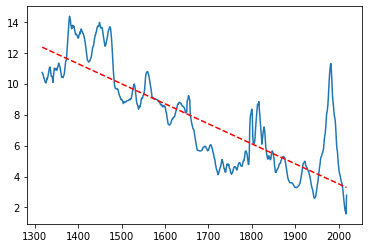

In [308]:
import numpy
x=df_.index
y=df_['Nominal']
plt.plot(x,y)

# calc the trendline
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

y=-0.012928x+(29.380418)


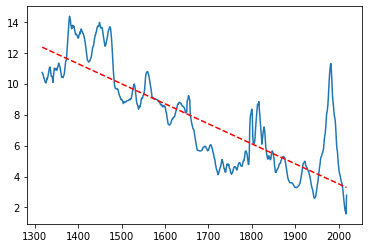

In [308]:
import numpy
x=df_.index
y=df_['Nominal']
plt.plot(x,y)

# calc the trendline
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

In [315]:
df_['rolling10'][10::10]

Year
1327    10.293694
1337    10.707121
1347    10.584047
1357    11.057584
1367    10.592885
          ...    
1977     8.001856
1987    10.310338
1997     7.127157
2007     4.222932
2017     2.408468
Name: rolling10, Length: 70, dtype: float64

In [250]:
df_['Real'][300:]

Year
1617    6.988471
1618    6.563279
1619    3.265896
1620    3.043249
1621    3.295766
          ...   
2014    0.566887
2015    0.675174
2016    0.832661
2017    0.822355
2018    1.563816
Name: Real, Length: 402, dtype: float64

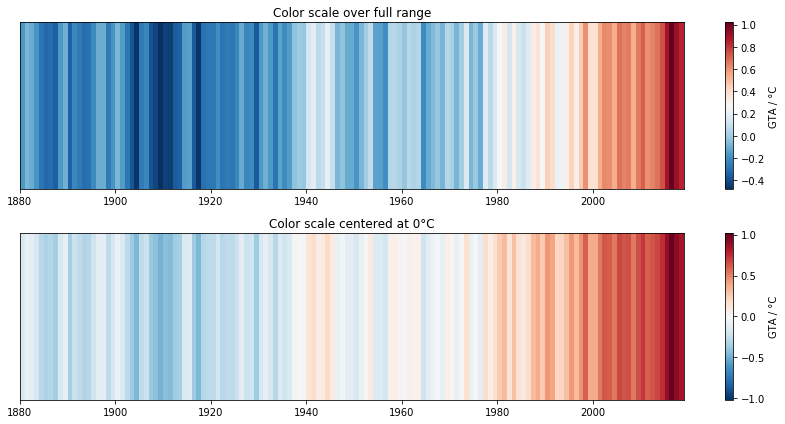

In [197]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from copy import deepcopy
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'Open Sans'

URL = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'

df = pd.read_fwf(
    URL,
    skiprows=(0, 1, 2, 4),
    index_col=0,
)
year_mean = df['No_Smoothing']
# year_mean = df_['norm']
max_abs = np.max(np.abs(year_mean))


fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


cmap = plt.get_cmap('RdBu_r')

rectangles = [Rectangle((year, 0), 1, 1) for year in year_mean.index]


col1 = PatchCollection(rectangles)
col1.set_array(year_mean)
col1.set_cmap(cmap)
col2 = deepcopy(col1)
col2.set_clim(-max_abs, max_abs)

ax1.add_collection(col1)
ax2.add_collection(col2)

for ax in (ax1, ax2):
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_xlim(1880, 2019)

ax1.set_title('Color scale over full range')
ax2.set_title('Color scale centered at 0°C')
fig.colorbar(col1, ax=ax1, label='GTA / °C')
fig.colorbar(col2, ax=ax2, label='GTA / °C')
fig.tight_layout()
# fig.savefig('comparison.png', bbox_inches='tight')

In [211]:
df_ = df_[:-1]

TypeError: 'method' object is not subscriptable

In [203]:
df_.index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Year', length=139)

In [219]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_[['Real']])
df_['norm'] = scaler.transform(df_[['Real']])


/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [196]:
df_.index= int(df_.index)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Index'

In [191]:
df_=df_.dropna()

In [170]:
df_['Real']

0      11.894461
1      11.371912
2      -3.022267
3      -8.274024
4       0.965759
         ...    
698     0.675174
699     0.832661
700     0.822355
701     1.563816
704     4.603811
Name: Real, Length: 703, dtype: float64